In [20]:
import gym
import numpy as np
from tqdm.notebook import tnrange
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [9]:
env = gym.make("FrozenLake-v0")
#env = gym.make("FrozenLake-v0", is_slippery=False)

In [10]:
action_space_size = env.action_space.n  #rows of q table
state_space_size =  env.observation_space.n #cols of q table

In [11]:
#initiate q table with zeros
q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [12]:
num_episodes = 9500
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.001
exploration_decay_rate = 0.001

In [17]:
rewards_all_episodes=[]
for episode in tnrange(num_episodes):
    
    state = env.reset()
    done=False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        exploration_switch = random.uniform(0,1)
        
        if exploration_switch > exploration_rate:
            #exploit
            action = np.argmax(q_table[state,:])
        else:
            #explore = sample an action randomly
            action = env.action_space.sample()
            
        #action has been chosen, now step
        new_state, reward, done, info = env.step(action)
        
        #update q table
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
        learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        #update state
        state = new_state
        
        #update rewards
        rewards_current_episode += reward
        
        if done==True:
            break
    
    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
    (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    
    rewards_all_episodes.append(rewards_current_episode)
    

In [22]:
print(q_table)

[[0.52521087 0.47671617 0.48047233 0.47906213]
 [0.35085913 0.34160905 0.24309115 0.48318311]
 [0.41902397 0.38931675 0.41765603 0.45747838]
 [0.30766824 0.23812757 0.38053843 0.44327778]
 [0.55408156 0.33575365 0.42823025 0.30300344]
 [0.         0.         0.         0.        ]
 [0.26070434 0.12567661 0.16349221 0.17904416]
 [0.         0.         0.         0.        ]
 [0.42212534 0.41483501 0.36607316 0.58426809]
 [0.47281312 0.66406317 0.48855105 0.35832271]
 [0.58486558 0.32606821 0.34423679 0.33301631]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.50798131 0.50580701 0.75725769 0.52051011]
 [0.70556995 0.89389773 0.70101002 0.69642091]
 [0.         0.         0.         0.        ]]


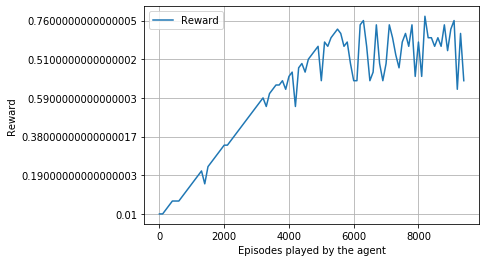

In [21]:
def plot_reward_per_n_episodes(total_num_episodes, rewards_all_episodes, n):
    rewards_per_n_episodes = np.split(np.array(rewards_all_episodes),num_episodes/n)
    list_of_rewards_per_n_episode = []
    count=0

    for r in rewards_per_n_episodes:
        list_of_rewards_per_n_episode.append(str(sum(r/n)))
        count += 100

    fig, ax = plt.subplots(1,1)
    x_list = [a for a in range(0,total_num_episodes, n)]
    ax.plot(x_list, list_of_rewards_per_n_episode, label='Reward')
    tick_spacing = 9
    ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.xlabel('Episodes played by the agent')
    plt.ylabel('Reward')
    plt.legend()
    plt.grid()
    
plot_reward_per_n_episodes(num_episodes, rewards_all_episodes, 100)